[Reference](https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Load data
data = load_breast_cancer()

In [2]:
df = pd.concat([
    pd.DataFrame(data.data, columns=data.feature_names),
    pd.DataFrame(data.target, columns=['y'])
], axis=1)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# 1. Obtain importances from coefficients

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

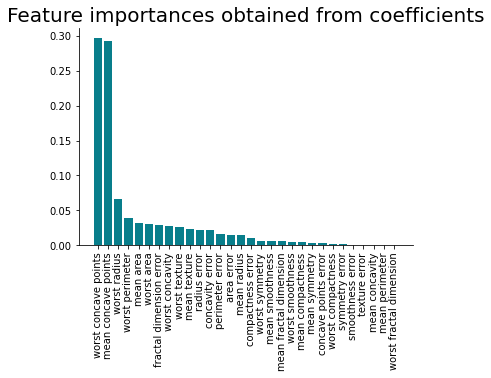

In [6]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# 2. Obtain importances from a tree-based model

In [5]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

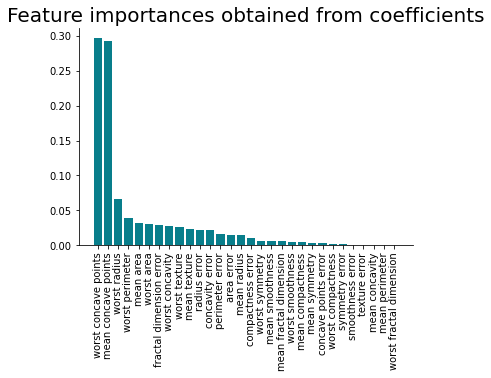

In [7]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Obtain importances from PCA loading scores

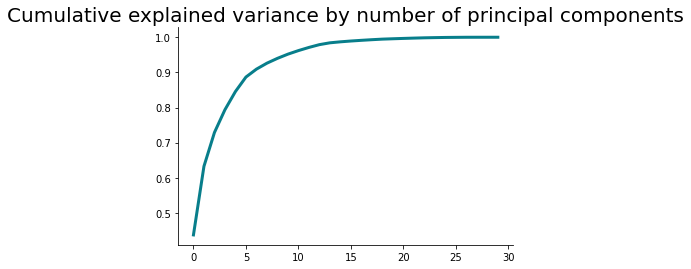

In [8]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [9]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.783559,-0.577423,-0.015448,-0.061600,0.056542,0.032320,-0.126638,0.004863,0.102699,0.070119,-0.058116,0.026575,0.012348,0.033296,0.038642,-0.006917,0.059018,0.040251,0.038398,0.000669,-0.019487,0.005920,-0.020009,-0.019015,0.012820,-0.011914,0.008478,0.007393,0.006400,0.007589
mean texture,0.371967,-0.128012,0.088003,0.851102,0.034107,-0.121844,0.004254,0.094800,-0.168652,-0.010506,-0.152511,0.112310,0.117600,-0.008716,0.043852,-0.044693,-0.007780,0.014765,0.000547,-0.053475,0.062076,0.024667,-0.020541,0.003951,-0.013367,-0.001341,0.001087,0.000095,-0.000306,0.000015
mean perimeter,0.816365,-0.534263,-0.016573,-0.063863,0.056378,0.028074,-0.117411,-0.001225,0.100753,0.057988,-0.068015,0.014961,0.023271,0.026037,0.033533,0.000186,0.057235,0.039612,0.042501,0.002913,-0.016562,0.008804,-0.009313,-0.012118,0.003980,-0.012644,0.007687,0.000773,0.010616,-0.007530
mean area,0.793613,-0.568269,0.047940,-0.082217,0.015615,0.002670,-0.065409,0.037467,0.103161,0.088953,-0.025000,0.021575,0.042512,0.014029,0.016021,-0.011679,0.090532,-0.016583,0.014668,-0.005162,-0.006398,0.016201,-0.003763,0.022362,0.016413,0.037472,-0.033660,-0.008272,-0.012786,-0.000350
mean smoothness,0.536881,0.420954,-0.215548,-0.176923,-0.483525,-0.299995,-0.094875,-0.210312,0.002419,-0.097695,-0.047679,0.126251,0.066075,0.195084,0.042032,-0.001587,-0.001939,0.038292,-0.091017,0.006054,-0.015056,-0.000303,-0.002806,0.009027,-0.005208,-0.001012,-0.005563,0.000248,-0.000021,-0.000050


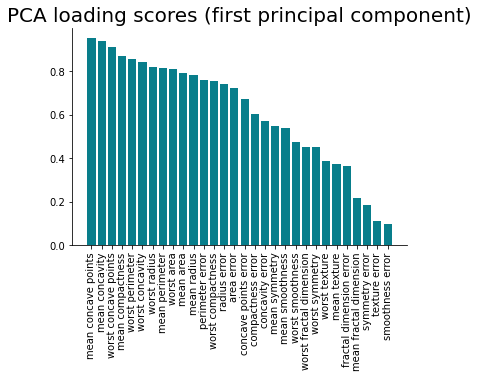

In [10]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()